# Split data by magnification

In [1]:
import os
import cv2
import shutil
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
df = pd.DataFrame(os.listdir("../Cancer/"))
df = df.rename(columns = {0:'file_loc'})
df['label'] = df['file_loc'].apply(lambda x:x.split("_")[0])
df['class'] = df['label'].apply(lambda x: 0 if x =='benign' else 1)
df['magnify'] = df['file_loc'].apply(lambda x:x.split("-")[-2])
df.set_index("file_loc",inplace=True)

In [3]:
df.head(3)

,label,class,magnify
file_loc,,,
benign_SOB_B_A-14-22549AB-100-001.png,benign,0,100
benign_SOB_B_A-14-22549AB-100-002.png,benign,0,100
benign_SOB_B_A-14-22549AB-100-003.png,benign,0,100


In [4]:
df.tail(3)

,label,class,magnify
file_loc,,,
malignant_SOB_M_PC-15-190EF-400-013.png,malignant,1,400
malignant_SOB_M_PC-15-190EF-400-014.png,malignant,1,400
malignant_SOB_M_PC-15-190EF-400-015.png,malignant,1,400


# divide by magnifying factor

In [5]:
df_40x = df[df['magnify'] == '40']
df_100x = df[df['magnify'] == '100']
df_200x = df[df['magnify'] == '200']
df_400x = df[df['magnify'] == '400']

In [6]:
df_40x.head(3)

,label,class,magnify
file_loc,,,
benign_SOB_B_A-14-22549AB-40-001.png,benign,0,40
benign_SOB_B_A-14-22549AB-40-002.png,benign,0,40
benign_SOB_B_A-14-22549AB-40-003.png,benign,0,40


In [7]:
print('total iamge 40x  : {}'.format(len(df_40x)))
print('total iamge 100x : {}'.format(len(df_100x)))
print('total iamge 200x : {}'.format(len(df_200x)))
print('total iamge 400x : {}'.format(len(df_400x)))

total iamge 40x  : 1995
total iamge 100x : 2081
total iamge 200x : 2013
total iamge 400x : 1820


In [8]:
# Creating the directories to store images

# 40x 
os.makedirs("../data_magnify/40x/Cancer_train")
os.makedirs("../data_magnify/40x/Cancer_test")
os.makedirs("../data_magnify/40x/Cancer_validation")

os.makedirs("../data_magnify/40x/Cancer_train/benign")
os.makedirs("../data_magnify/40x/Cancer_train/malignant")

os.makedirs("../data_magnify/40x/Cancer_validation/benign")
os.makedirs("../data_magnify/40x/Cancer_validation/malignant")

os.makedirs("../data_magnify/40x/Cancer_test/benign")
os.makedirs("../data_magnify/40x/Cancer_test/malignant")

# 100x 
os.makedirs("../data_magnify/100x/Cancer_train")
os.makedirs("../data_magnify/100x/Cancer_test")
os.makedirs("../data_magnify/100x/Cancer_validation")

os.makedirs("../data_magnify/100x/Cancer_train/benign")
os.makedirs("../data_magnify/100x/Cancer_train/malignant")

os.makedirs("../data_magnify/100x/Cancer_validation/benign")
os.makedirs("../data_magnify/100x/Cancer_validation/malignant")

os.makedirs("../data_magnify/100x/Cancer_test/benign")
os.makedirs("../data_magnify/100x/Cancer_test/malignant")

# 200x 
os.makedirs("../data_magnify/200x/Cancer_train")
os.makedirs("../data_magnify/200x/Cancer_test")
os.makedirs("../data_magnify/200x/Cancer_validation")

os.makedirs("../data_magnify/200x/Cancer_train/benign")
os.makedirs("../data_magnify/200x/Cancer_train/malignant")

os.makedirs("../data_magnify/200x/Cancer_validation/benign")
os.makedirs("../data_magnify/200x/Cancer_validation/malignant")

os.makedirs("../data_magnify/200x/Cancer_test/benign")
os.makedirs("../data_magnify/200x/Cancer_test/malignant")

# 400x 
os.makedirs("../data_magnify/400x/Cancer_train")
os.makedirs("../data_magnify/400x/Cancer_test")
os.makedirs("../data_magnify/400x/Cancer_validation")

os.makedirs("../data_magnify/400x/Cancer_train/benign")
os.makedirs("../data_magnify/400x/Cancer_train/malignant")

os.makedirs("../data_magnify/400x/Cancer_validation/benign")
os.makedirs("../data_magnify/400x/Cancer_validation/malignant")

os.makedirs("../data_magnify/400x/Cancer_test/benign")
os.makedirs("../data_magnify/400x/Cancer_test/malignant")

# 40x image

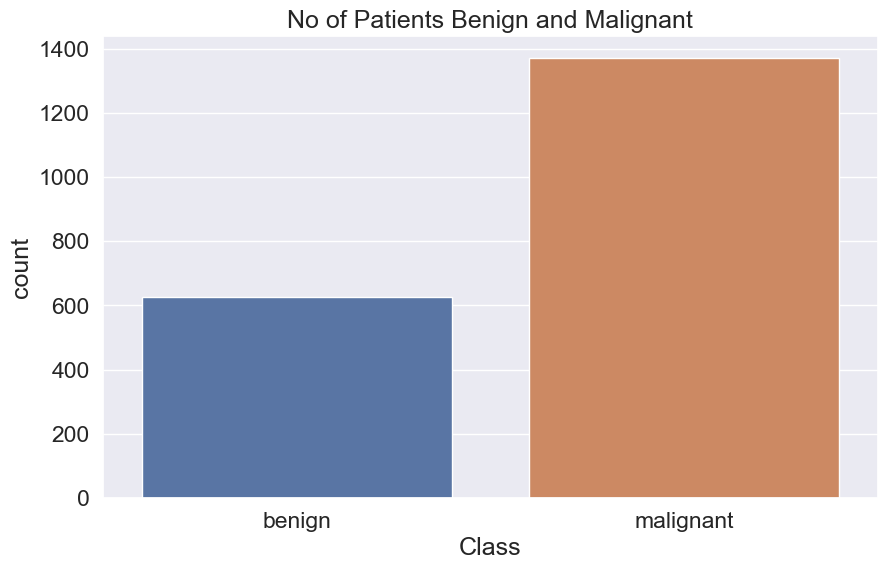

In [9]:
plt.figure(figsize=(10,6))
sns.set(font_scale = 1.5)
sns.set_style("darkgrid")
sns.countplot(x=df_40x['label']);
plt.xlabel("Class")
plt.title("No of Patients Benign and Malignant");

- Data is Highly Imabalanced as this is the case with the real world.
- Medical datas are usually imbalanced because of their nature.

Using the data frame, the splitting for train, test and validation is done.
according to the research proposal plan, the distribution of the proportion of data is 
- 80%, 15%, 5% of training, test, and validation data

In [10]:
data_train_and_val, data_test = train_test_split(df_40x, test_size = 0.15, random_state = 47)
#Traing and val
data_train, data_val = train_test_split(data_train_and_val, test_size = 0.05, random_state = 47)

In [11]:
print("Training size :", data_train.shape)
print("Validation size :", data_val.shape)
print("Testing size :", data_test.shape)

Training size : (1610, 3)
Validation size : (85, 3)
Testing size : (300, 3)


<function matplotlib.pyplot.show(close=None, block=None)>

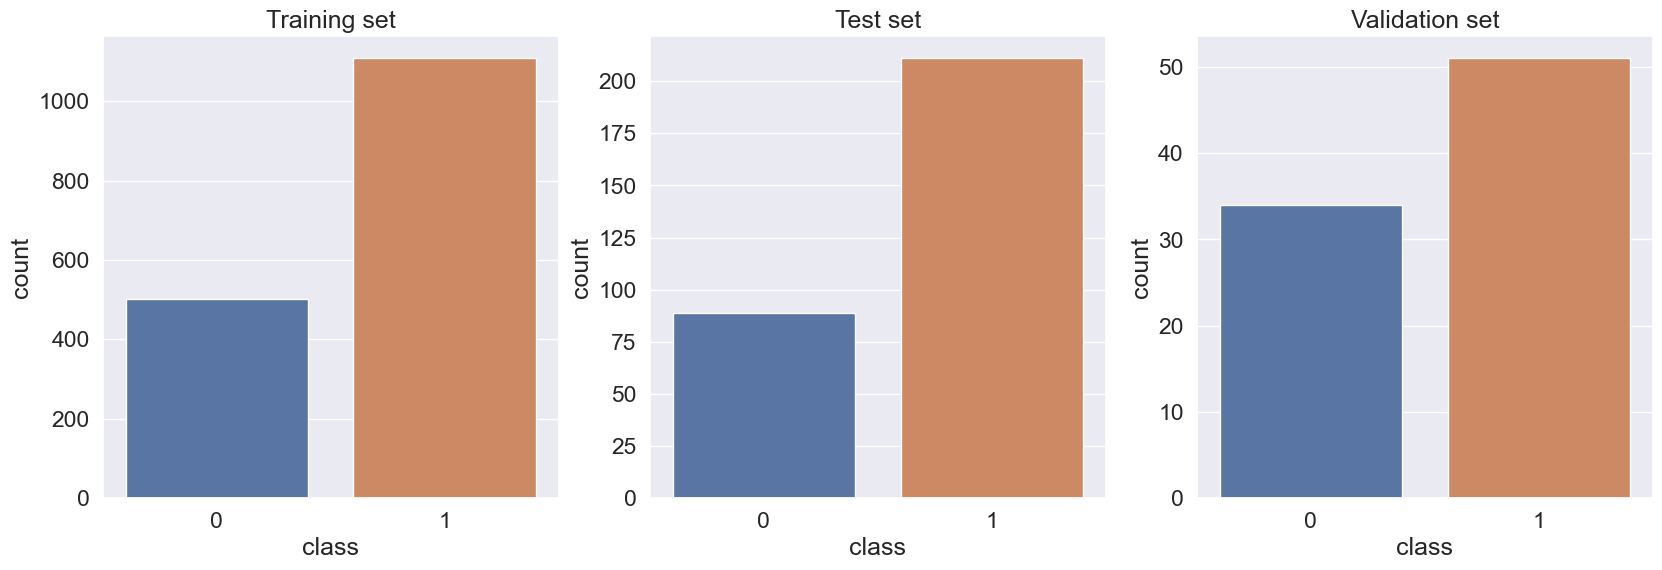

In [12]:
#Plotting
sns.set_style("darkgrid")
plt.figure(figsize = (20,6))
plt.subplot(1,3,1)
sns.countplot( x=data_train["class"])
plt.title("Training set")
plt.subplot(1,3,3)
sns.countplot(x=data_val['class'])
plt.title("Validation set")
plt.subplot(1,3,2)
sns.countplot(x=data_test['class']);
plt.title("Test set");
plt.show

In [13]:
# Separating the benign and malignant patients from train data
train_has_cancer = data_train[data_train['class'] == 1]
train_has_no_cancer = data_train[data_train['class'] == 0]

In [14]:
# Upsampling the minority class by the size of majority class with replacement
train_has_no_cancer_upsample = resample(train_has_no_cancer, n_samples = len(train_has_cancer), random_state = 47, replace = True)

In [15]:
#Concatenating the upsampled minority class and the majority class
data_train = pd.concat([train_has_cancer,train_has_no_cancer_upsample])

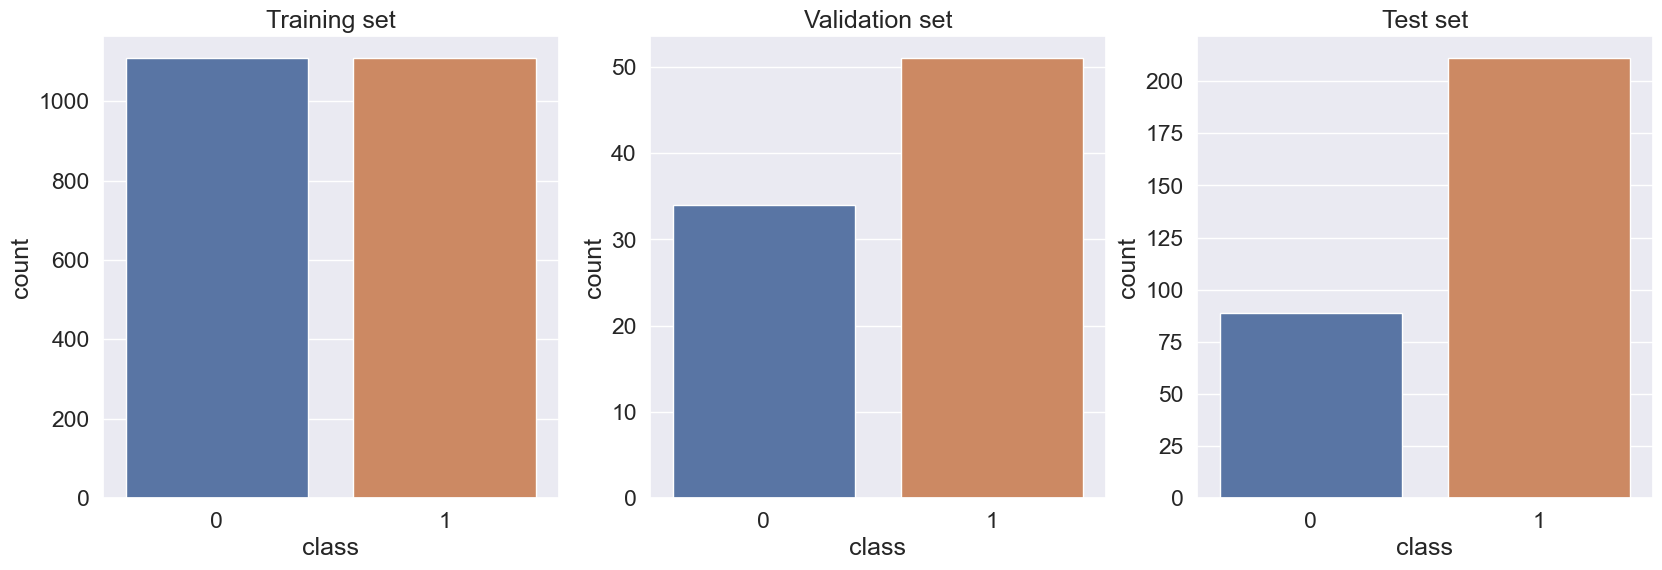

In [16]:
sns.set_style("darkgrid")
plt.figure(figsize = (20,6))
plt.subplot(1,3,1)
sns.countplot(x=data_train['class'])
plt.title("Training set")
plt.subplot(1,3,2)
sns.countplot(x=data_val['class'])
plt.title("Validation set")
plt.subplot(1,3,3)
sns.countplot(x=data_test['class']);
plt.title("Test set");

- Using the above directories and the splitted data frames data_train, data_val, data_test.
- We are moving the images to the corresponding directories based on the class of the image(Benign or Malignant).

In [17]:
# Training data
i = 1
for img in data_train.index:
    if img!=".DS_Store":
        target = df_40x.loc[img,'class']
        if target == 1:
            label = 'malignant'
        else:          
            label = 'benign'      
        src = os.path.join("../Cancer/",img)
        dest = os.path.join("../data_magnify/40x/Cancer_train/",label, "image" + str(i)+".png")
        img1 = np.array(cv2.imread(src))
        cv2.imwrite(dest,img1)
        i = i+1

In [18]:
# Testing data
for img in data_test.index:
    target = data_test.loc[img,'class']
    if target == 1:
        label = 'malignant'
    else:
        label = 'benign'
        
    src = os.path.join("../Cancer/",img)
    dest = os.path.join("../data_magnify/40x/Cancer_test/",label,img)
    shutil.copyfile(src,dest)

In [19]:
# Validation data
for img in data_val.index:
    target = data_val.loc[img,'class']
    if target == 1:
        label = 'malignant'
    else:
        label = 'benign'
        
    src = os.path.join("../Cancer/",img)
    dest = os.path.join("../data_magnify/40x/Cancer_validation/",label,img)
    shutil.copyfile(src,dest)

In [20]:
# Checking their lengths
print("Training Data:")
print(" ")
print("Benign   :",len(os.listdir("../data_magnify/40x/Cancer_train/benign/")))
print("Malignant:",len(os.listdir("../data_magnify/40x/Cancer_train/malignant/")))
print(" ")
print("Testing Data:")
print(" ")
print("Benign size    :",len(os.listdir("../data_magnify/40x/Cancer_test/benign/")))
print("Malignant size :",len(os.listdir("../data_magnify/40x/Cancer_test/malignant/")))
print(" ")
print("Validation Data")
print(" ")
print("Benign size    :",len(os.listdir("../data_magnify/40x/Cancer_validation/benign/")))
print("Malignant size :",len(os.listdir("../data_magnify/40x/Cancer_validation/malignant/")))

Training Data:
 
Benign   : 1108
Malignant: 1108
 
Testing Data:
 
Benign size    : 89
Malignant size : 211
 
Validation Data
 
Benign size    : 34
Malignant size : 51
